In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 模拟天数
days = 30
# 进水水质（单位：mg/L）
inlet = {
    'BOD': np.random.normal(200, 20, days),  # 生化需氧量
    'COD': np.random.normal(400, 30, days),  # 化学需氧量
    'NH3-N': np.random.normal(30, 5, days),  # 氨氮
    'TP': np.random.normal(4, 0.5, days)     # 总磷
}

# 假设处理效率
removal_rate = {
    'BOD': 0.92,
    'COD': 0.85,
    'NH3-N': 0.80,
    'TP': 0.65
}

# 计算出水水质
def calc_outlet(inlet, removal_rate):
    outlet = {}
    for key in inlet:
        outlet[key] = inlet[key] * (1 - removal_rate[key])
    return outlet

outlet = calc_outlet(inlet, removal_rate)

# 整理为DataFrame
df = pd.DataFrame({
    'Day': np.arange(1, days+1),
    'BOD_in': inlet['BOD'],
    'BOD_out': outlet['BOD'],
    'COD_in': inlet['COD'],
    'COD_out': outlet['COD'],
    'NH3-N_in': inlet['NH3-N'],
    'NH3-N_out': outlet['NH3-N'],
    'TP_in': inlet['TP'],
    'TP_out': outlet['TP']
})
df.head()

,Day,BOD_in,BOD_out,COD_in,COD_out,NH3-N_in,NH3-N_out,TP_in,TP_out
0,1,199.405842,15.952467,368.073481,55.211022,35.590601,7.118120,3.624385,1.268535
1,2,220.024652,17.601972,353.141250,52.971188,29.668640,5.933728,3.854026,1.348909
2,3,214.995790,17.199663,383.714785,57.557218,30.777136,6.155427,4.728081,1.654828
3,4,201.308501,16.104680,336.195605,50.429341,34.906585,6.981317,3.685282,1.289849
4,5,198.690396,15.895232,404.102552,60.615383,33.970044,6.794009,4.350856,1.522799


C:\Users\18363030832\AppData\Local\Temp\ipykernel_12140\1552217423.py:12: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\18363030832\AppData\Local\Temp\ipykernel_12140\1552217423.py:12: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\18363030832\AppData\Local\Temp\ipykernel_12140\1552217423.py:12: UserWarning: Glyph 36827 (\N{CJK UNIFIED IDEOGRAPH-8FDB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\18363030832\AppData\Local\Temp\ipykernel_12140\1552217423.py:12: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\18363030832\AppData\Local\Temp\ipykernel_12140\1552217423.py:12: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\18363030832\AppData\Local\Temp\ipykernel_12140\155221742

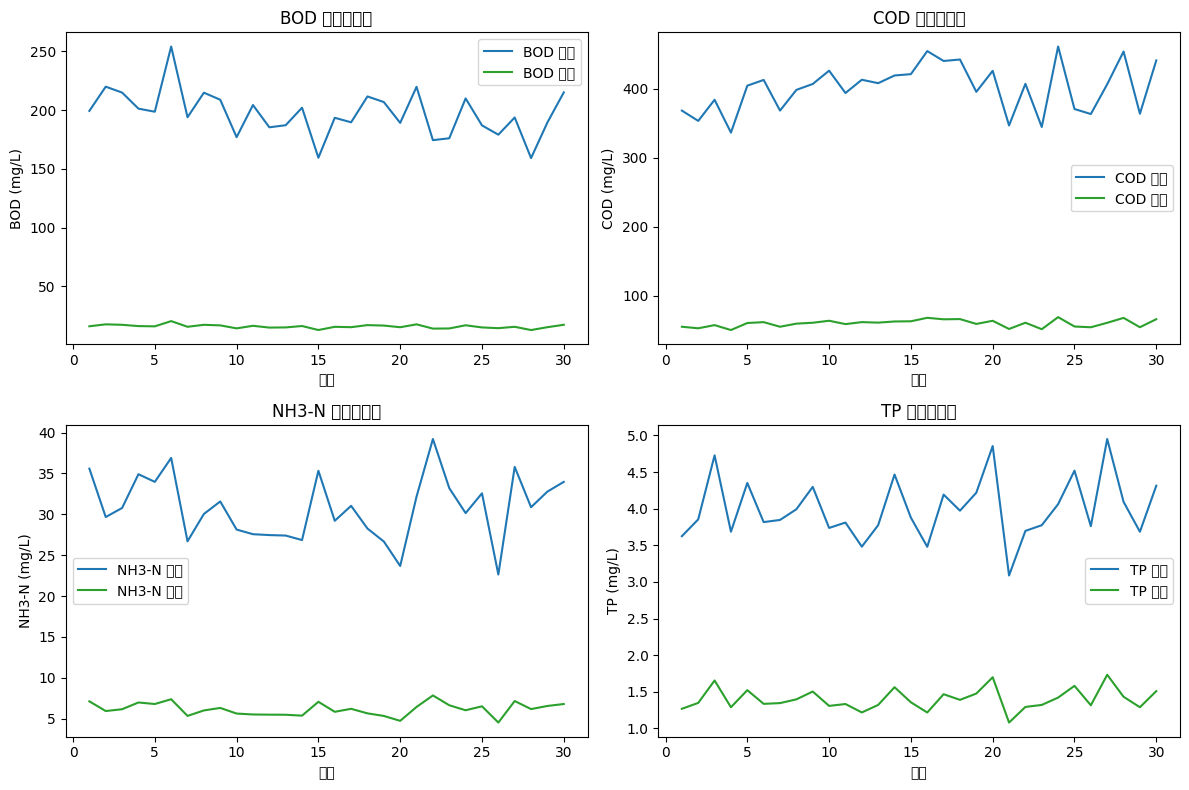

In [13]:
# 可视化进出水水质变化
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
water_quality = ['BOD', 'COD', 'NH3-N', 'TP']
for i, key in enumerate(water_quality):
    ax = axs[i//2, i%2]
    ax.plot(df['Day'], df[f'{key}_in'], label=f'{key} 进水', color='tab:blue')
    ax.plot(df['Day'], df[f'{key}_out'], label=f'{key} 出水', color='tab:green')
    ax.set_title(f'{key} 进出水变化')
    ax.set_xlabel('天数')
    ax.set_ylabel(f'{key} (mg/L)')
    ax.legend()
plt.tight_layout()
plt.show()

# 污水厂进出水水质模拟

本Notebook模拟典型污水厂进出水水质（如BOD、COD、氨氮、总磷等）随时间的变化过程。可用于分析污水处理工艺对水质的改善效果。